In [1]:
import numpy as np
import pandas as pd
from templateobs import *
from itertools import chain, combinations
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\CLILI\AppData\Local\Temp\ipykernel_4572\3355867879.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Utils

# Exercise 1

Todas las demostraciones se entregan en un pdf en la carpeta

# Exercise 2


## Exercise 2.1

In [2]:
example_database=[["A","B","D","E"],
                  ["B","C","E"],
                  ["A","B","D","E"],  
                  ["A","B","C","E"],
                  ["A","B","C","D","E"],
                  ["B","C","D"]]
example_premis=["E","B"]
example_conclusion=["D"]
metrics = ["sup", "conf", "lift", "leverage", "jaccard", "conviction", "oddsratio", "imp"]


In [3]:
def sup(D, X, Y=None):
    complete_rule_items = X.copy()
    support = 0
    if Y is None:
        for transaction in D:
            if all(item in transaction for item in X):
                support += 1
    else:
        complete_rule_items.extend(Y)
        for transaction in D:
            if all(item in transaction for item in complete_rule_items):
                support += 1
    return support

In [4]:
def conf(D, X, Y):
    pre_support = 0
    complete_rule_support = 0
    for transaction in D:
        if all(item in transaction for item in X):
            pre_support += 1
            if all(item in transaction for item in Y):
                complete_rule_support += 1
    if pre_support == 0:
      return 0
    else:
      confidence = complete_rule_support / pre_support
      return confidence

In [5]:
def lift(D, X, Y=None):
    if Y is None:
        Y=X.copy()
    supports = [0, 0, 0]
    for transaction in D:
        if all(item in transaction for item in X):
            supports[0] += 1
            if all(item in transaction for item in Y):
                supports[2] += 1
        if all(item in transaction for item in Y):
            supports[1] += 1
    r_supports = list(map(lambda x: x / len(D), supports))
    if 0 in r_supports:
        return None
    else:
        final_lift = r_supports[2] / (r_supports[0] * r_supports[1])
        return final_lift

In [6]:
def leverage(D,X,Y):
    supports=[0,0,0]
    for transaction in D:
        if all(item in transaction for item in X):
            supports[0]+=1
            if all(item in transaction for item in Y):
                supports[2]+=1
        if all(item in transaction for item in Y):
            supports[1]+=1
    r_supports=list(map(lambda x: x/len(D), supports))
    final_leverage=r_supports[2]-r_supports[0]*r_supports[1]
    return(final_leverage)

In [7]:
def jaccard(D,X,Y):
    #0->X	1->Y	2->XY
    supports=[0,0,0]
    for transaction in D:
        if all(item in transaction for item in X):
            supports[0]+=1
            if all(item in transaction for item in Y):
                supports[2]+=1
        if all(item in transaction for item in Y):
            supports[1]+=1
    r_supports=list(map(lambda x: x/len(D), supports))
    final_jaccard=(r_supports[2])/(r_supports[0]+r_supports[1]-r_supports[2])
    return(final_jaccard)

In [8]:
def conviction(D,X,Y):
    support_y=0
    for transaction in D:
        if all(item in transaction for item in Y):
            support_y+=1
    r_support_y=support_y/len(D)
    confidence_xy=conf(D,X,Y)
    if confidence_xy>=1:
        return None
    else:
        final_conviction=(1-r_support_y)/(1-confidence_xy)
        return(final_conviction)

In [9]:
def oddsRatio(D,X,Y):
    #0->XY	1->X¬Y	2->¬XY	3->¬X¬Y
    supports=[0,0,0,0]
    for transaction in D:
        if all(item in transaction for item in X):
            if all(item in transaction for item in Y):
                supports[0]+=1
            else:
                supports[1]+=1
        else:
            if all(item in transaction for item in Y):
                supports[2]+=1
            else:
                supports[3]+=1
    final_odds_ratio=((supports[0]+1)*(supports[3]+1))/((supports[1]+1)*(supports[2]+1))
    return(final_odds_ratio)

In [10]:
def imp(D,X,Y):
    if len(X) < 2:
        return 0
    else:
        w_conf=[]
        conf_xy=conf(D,X,Y)
        for W in X:
            w_conf.append(conf(D,[W],Y))
        final_improvement=conf_xy-max(w_conf)
        return final_improvement

In [11]:
def getRuleMetric(D,X,Y,metric):
    if metric == "sup":
        return sup(D,X,Y)
    elif metric == "conf":
        return conf(D,X,Y)
    elif metric == "lift":
        return lift(D,X,Y)
    elif metric == "leverage":
        return leverage(D,X,Y)
    elif metric == "jaccard":
        return jaccard(D,X,Y)
    elif metric == "conviction":
        return conviction(D,X,Y)
    elif metric == "oddsratio":
        return oddsRatio(D,X,Y)
    elif metric == "imp":
        return imp(D,X,Y)
    else:
        return "metrica invalida"
    
print(f"Premisa: {example_premis}\nConclusión:{example_conclusion}\n")
for metric in metrics:
    result= getRuleMetric(example_database,example_premis,example_conclusion,metric)
    print(f"{metric}: {result}")

Premisa: ['E', 'B']
Conclusión:['D']

sup: 3
conf: 0.6
lift: 0.8999999999999999
leverage: -0.05555555555555558
jaccard: 0.5
conviction: 0.8333333333333334
oddsratio: 0.6666666666666666
imp: -0.06666666666666665


## Exercise 2.2

In [12]:
def filterProductiveRules(D, R):
    productive_rules = []
    for rule in R:
        X, Y, sup_XY, conf_X_Y = rule
        imp_XY = imp(D, X, Y)
        if imp_XY > 0:
            productive_rules.append(rule)
    return productive_rules

## Exercise 2.3

In [13]:
R = getStrongRules(read_database("shop.dat"), 500, 0.95)

productive_rules = filterProductiveRules(read_database("shop.dat"), R)

df = pd.DataFrame(productive_rules, columns=['X', 'Y', 'sup(XY)', 'conf(X -> Y)'])

#metrics = ["lift", "leverage", "jaccard", "conviction", "oddsratio", "imp"]

metrics = ["lift", "leverage", "jaccard", "conviction"]

for rule in productive_rules:
    for metric in metrics:
        df.loc[productive_rules.index(rule), metric] = getRuleMetric(read_database("shop.dat"), rule[0], rule[1], metric)

                   X           Y  sup(XY)  conf(X -> Y)        lift  leverage  \
37        [678, 960]  [185, 471]      648      0.968610  142.442627  0.006435   
40        [185, 471]  [678, 960]      648      0.952941  142.442627  0.006435   
97   [217, 661, 947]  [546, 923]      559      0.958834  159.805603  0.005555   
166       [546, 947]  [661, 923]      578      0.950658  152.593563  0.005742   
98   [217, 661, 923]  [546, 947]      559      0.957192  157.432859  0.005554   

      jaccard  conviction  
37   0.924394   31.640514  
40   0.924394   21.107837  
97   0.895833   24.145917  
166  0.885145   20.140405  
98   0.883096   23.217971  


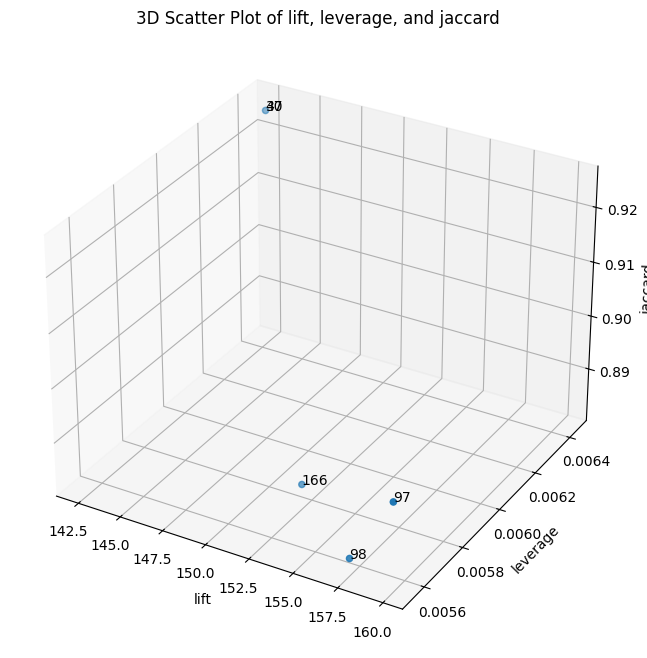

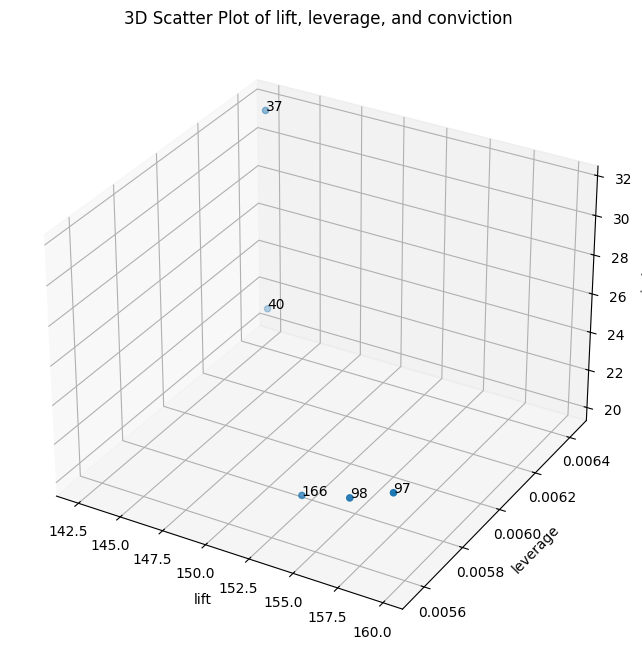

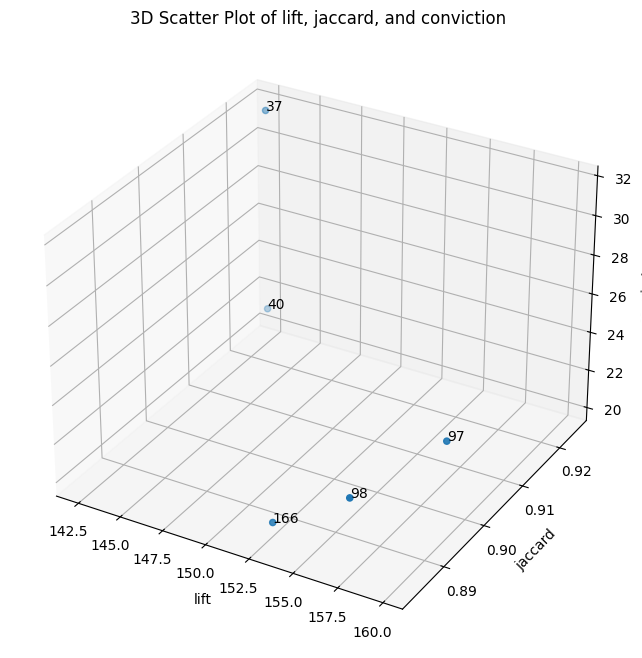

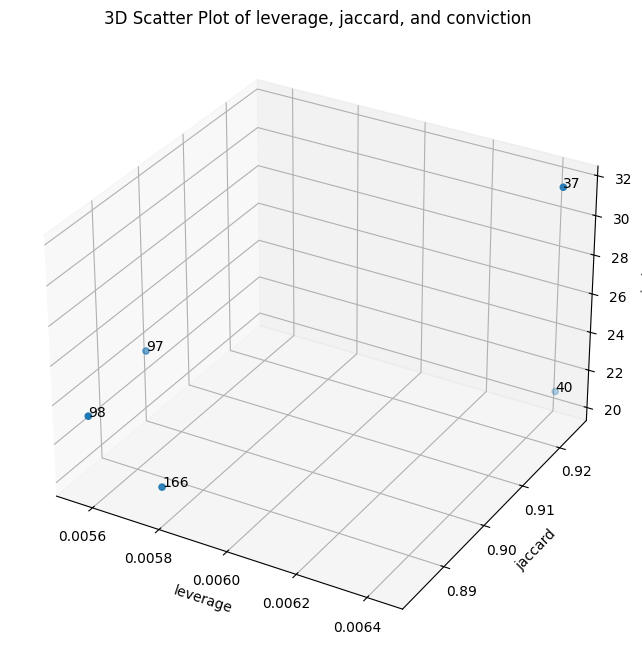

In [29]:
top_5_rules = df.nlargest(5, ['jaccard', 'leverage'])

print(top_5_rules)

for i in range(len(metrics)):
    for j in range(i+1, len(metrics)):
        for k in range(j+1, len(metrics)):
            fig = plt.figure(figsize=(10, 8))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(top_5_rules[metrics[i]], top_5_rules[metrics[j]], top_5_rules[metrics[k]])

            ax.set_xlabel(metrics[i])
            ax.set_ylabel(metrics[j])
            ax.set_zlabel(metrics[k])

            for idx, row in top_5_rules.iterrows():
                ax.text(row[metrics[i]], row[metrics[j]], row[metrics[k]], str(idx))

            plt.title(f"3D Scatter Plot of {metrics[i]}, {metrics[j]}, and {metrics[k]}")
            plt.show()


Se escogieron estas principales 5 reglas en base a los valores de lift, leverage, jaccard y conviction, esto porque por medio de estas medias se pueden observar que los valores de lift y leverage al ser mayores a 1 (en su mayoria en lift), se esta observando mas de lo que se podria esperar o es probable entre la unión de X, Y. Otra métrica importante es conviction, y esta al ser mayor de 1 nos indica que la tasa de fallo no tiene casi repercusión en los datos o reglas observadas.